# Get DWD CDC Station List for Climate Data

## 1. About the DWD Open Data Portal 

The data of the Climate Data Center (CDC) of the DWD (Deutscher Wetterdienst, German Weather Service) is provided on an **FTP server**. <br> **FTP** stands for _File Transfer Protocol_.

Open the FTP link ftp://opendata.dwd.de/climate_environment/CDC/ in your browser (copy-paste) and find our how it is structured hierarchically.

You can also open the link with **HTTPS** (Hypertext Transfer Protocol Secure): https://opendata.dwd.de/climate_environment/CDC/

**Download and read** the document https://opendata.dwd.de/climate_environment/CDC/Readme_intro_CDC_ftp.pdf

## 2. Download the Station Meta Data for Different Temporal Resolutions and Compare. 


**Q1:** Is there any difference of the station map in QGIS for different temporal resolutions?

Download the files:
* KL_Jahreswerte_Beschreibung_Stationen.txt
* KL_Tageswerte_Beschreibung_Stationen.txt
* TU_Stundenwerte_Beschreibung_Stationen.txt

from the DWD FTP server. The paths are given in the code below.

Convert the fixed column width formatted files to CSV files with appropriate column names and ";" as field separator like we have done before.

Import the CSV files to QGIS. Do the point clouds match?


In [192]:
server = "opendata.dwd.de"
user = "anonymous"
passwd = ""

localpath = "data"

# Activate only one of the following ftpdir / filename pairs at a time.

# ANNUAL
#ftpdir = "/climate_environment/CDC/observations_germany/climate/annual/kl/historical/"
#filename = "KL_Jahreswerte_Beschreibung_Stationen.txt"

# DAYLY
#ftpdir = "/climate_environment/CDC/observations_germany/climate/daily/kl/historical/"
#filename = "KL_Tageswerte_Beschreibung_Stationen.txt"

# HOURLY
#ftpdir = "/climate_environment/CDC/observations_germany/climate/hourly/air_temperature/historical/"
#filename = "TU_Stundenwerte_Beschreibung_Stationen.txt"


In [85]:
import os
print(os.listdir())

['Metadaten_Geographie_01303.txt', 'Metadaten_Geraete_Bedeckungsgrad_01303.html', 'Metadaten_Geraete_Bedeckungsgrad_01303.txt', 'Metadaten_Geraete_Lufttemperatur_01303.html', 'Metadaten_Geraete_Lufttemperatur_01303.txt', 'Metadaten_Geraete_Lufttemperatur_Maximum_01303.html', 'Metadaten_Geraete_Lufttemperatur_Maximum_01303.txt', 'Metadaten_Geraete_Lufttemperatur_Minimum_01303.html', 'Metadaten_Geraete_Lufttemperatur_Minimum_01303.txt', 'Metadaten_Geraete_Niederschlagshoehe_01303.html', 'Metadaten_Geraete_Niederschlagshoehe_01303.txt', 'Metadaten_Geraete_Sonnenscheindauer_01303.html', 'Metadaten_Geraete_Sonnenscheindauer_01303.txt', 'Metadaten_Parameter_klima_jahr_01303.html', 'Metadaten_Parameter_klima_jahr_01303.txt', 'Metadaten_Stationsname_01303.html', 'Metadaten_Stationsname_01303.txt', 'produkt_klima_jahr_18880101_20181231_01303.txt']


In [86]:
# In case the local directory (relative path) does not exist create it. Don't raise error if it is already existing.
os.makedirs("data", exist_ok = True)

In [187]:
from ftplib import FTP
#domain name or server ip:
ftp = FTP(server)
res = ftp.login(user=user, passwd = passwd)
print(res)

230 Login successful.


In [ ]:
res = ftp.cwd(ftpdir)
print(res)
ftp.dir()

In [188]:
#lines = []
def cb(input, lst):
    global lines
    lines.append(input)
    print("yeah: ",input)

In [189]:
lines = []
import functools

s = ftp.retrlines("LIST "+ftpdir2, functools.partial(cb, lst = lines))

yeah:  drwxrwxr-x    4 5521     15101        4096 Nov 14  2018 kl
yeah:  drwxrwxr-x    4 5521     15101        4096 Nov 14  2018 more_precip
yeah:  drwxrwxr-x    4 5521     15101        4096 Nov 14  2018 soil_temperature
yeah:  drwxrwxr-x    2 5521     15101        4096 Oct 06 08:38 solar
yeah:  drwxrwxr-x    4 5521     15101       16384 Jul 02 06:24 water_equiv
yeah:  drwxrwxr-x    4 5521     15101        4096 Jun 17 07:48 weather_phenomena


In [184]:
lines = []
r = ftp.retrlines("LIST "+ftpdir2, lines.append)

In [190]:
def trial():
    lst = []
    for l in ["a","b","c"]:
        lst.append(l)
    return lst

In [191]:
print(trial())

['a', 'b', 'c']


In [52]:
def grabFile(filename,localpath):
    localfile = open(localpath+"/"+filename, 'wb')
    ftp.retrbinary('RETR ' + filename, localfile.write, 1024)
    localfile.close()

In [53]:
grabFile(filename,localpath)

In [159]:
# Finally disconnect from the FPT Server
res = ftp.quit()
print(res)

AttributeError: 'NoneType' object has no attribute 'sendall'

## 3. Read the Station Data into a Pandas Dataframe

The Station Data is in fixed column format. Pandas provides a reader for text files with fixed column width.  

Search the Pandas doc https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html for this fixed column reader. Learn how to use it and read the station data file into a dataframe.

Hint: Count the characters per column (column wdith) in a text editor.

### Extract column names and translate them from DE to EN.

In [55]:
# extract column names. They are in German (de)
# We have to use codecs because of difficulties with character encoding (German Umlaute)
import codecs
file = codecs.open(localpath+"/"+filename,"r","utf-8")
r = file.readline()
file.close()
colnames_de = r.split()
colnames_de

['Stations_id',
 'von_datum',
 'bis_datum',
 'Stationshoehe',
 'geoBreite',
 'geoLaenge',
 'Stationsname',
 'Bundesland']

In [56]:
# translation dictionary
translate = \
{'Stations_id':'station_id',
 'von_datum':'date_from',
 'bis_datum':'date_to',
 'Stationshoehe':'altitude',
 'geoBreite':'latitude',
 'geoLaenge':'longitude',
 'Stationsname':'name',
 'Bundesland':'state'}

In [57]:
for h in colnames_de:
    print(translate[h])

station_id
date_from
date_to
altitude
latitude
longitude
name
state


In [58]:
# Pythonic
colnames_en = [translate[h] for h in colnames_de]
print(colnames_en)

['station_id', 'date_from', 'date_to', 'altitude', 'latitude', 'longitude', 'name', 'state']


### Read the formatted data with pd.read_fwf().

In [59]:
import pandas as pd

In [60]:
help(pd.read_fwf)

Help on function read_fwf in module pandas.io.parsers:

read_fwf(filepath_or_buffer, colspecs='infer', widths=None, **kwds)
    Read a table of fixed-width formatted lines into DataFrame
    
    Also supports optionally iterating or breaking of the file
    into chunks.
    
    Additional help can be found in the `online docs for IO Tools
    <http://pandas.pydata.org/pandas-docs/stable/io.html>`_.
    
    Parameters
    ----------
    filepath_or_buffer : str, pathlib.Path, py._path.local.LocalPath or any \
    object with a read() method (such as a file handle or StringIO)
        The string could be a URL. Valid URL schemes include http, ftp, s3, and
        file. For file URLs, a host is expected. For instance, a local file could
        be file://localhost/path/to/table.csv
    colspecs : list of pairs (int, int) or 'infer'. optional
        A list of pairs (tuples) giving the extents of the fixed-width
        fields of each line as half-open intervals (i.e.,  [from, to[ ).
  

In [61]:
# Skip the first two rows and set the column names.
df = pd.read_fwf(localpath+"/"+filename,skiprows=2,names=colnames_en)
df.head()

,station_id,date_from,date_to,altitude,latitude,longitude,name,state
0,1,19370101,19860630,478,47.8413,8.8493,Aach,Baden-Württemberg
1,3,18910101,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,11,19800901,20191005,680,47.9737,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
3,44,19690101,20191005,44,52.9336,8.2370,Großenkneten,Niedersachsen
4,52,19690101,20011231,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein


In [62]:
# Better parse dates! Column 0 should be treated as index. It makes the later export with pd.to_csv() easier.
df = pd.read_fwf(localpath+"/"+filename,skiprows=2,names=colnames_en, parse_dates=["date_from","date_to"],index_col = 0)
df.head()

,date_from,date_to,altitude,latitude,longitude,name,state
station_id,,,,,,,
1,1937-01-01,1986-06-30,478,47.8413,8.8493,Aach,Baden-Württemberg
3,1891-01-01,2011-03-31,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
11,1980-09-01,2019-10-05,680,47.9737,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
44,1969-01-01,2019-10-05,44,52.9336,8.2370,Großenkneten,Niedersachsen
52,1969-01-01,2001-12-31,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein


In [63]:
df.shape

(1323, 7)

## 4. Export the dataframe as CSV file

Use semicolons as field delimiters.

In [64]:
# extract basename (Filename) without extension
import os
fname = os.path.splitext(filename)[0]
csvname = fname + ".csv"
print(csvname)

df.to_csv(localpath+"/"+csvname, sep =";")

KL_Tageswerte_Beschreibung_Stationen.csv


## 5. Read time series

In [31]:
os.getcwd()
#os.chdir("../..")
#os.chdir("..")

'C:\\Users\\rb\\Documents\\HSRW\\Teaching\\EE_GeoData\\EE_Geodata_WS2019\\REPO\\EE_3.07_Geodata_WS2019\\gdms0201_DWD_NRW_fun_dev'

In [32]:
import os
homedir = os.getcwd()

In [33]:
filename = 'produkt_klima_jahr_18880101_20181231_01303.txt'
os.chdir('data/DWD/jahreswerte_KL_01303_18880101_20181231_hist')

In [34]:
#os.chdir(homedir)

In [35]:
os.listdir()

['Metadaten_Geographie_01303.txt',
 'Metadaten_Geraete_Bedeckungsgrad_01303.html',
 'Metadaten_Geraete_Bedeckungsgrad_01303.txt',
 'Metadaten_Geraete_Lufttemperatur_01303.html',
 'Metadaten_Geraete_Lufttemperatur_01303.txt',
 'Metadaten_Geraete_Lufttemperatur_Maximum_01303.html',
 'Metadaten_Geraete_Lufttemperatur_Maximum_01303.txt',
 'Metadaten_Geraete_Lufttemperatur_Minimum_01303.html',
 'Metadaten_Geraete_Lufttemperatur_Minimum_01303.txt',
 'Metadaten_Geraete_Niederschlagshoehe_01303.html',
 'Metadaten_Geraete_Niederschlagshoehe_01303.txt',
 'Metadaten_Geraete_Sonnenscheindauer_01303.html',
 'Metadaten_Geraete_Sonnenscheindauer_01303.txt',
 'Metadaten_Parameter_klima_jahr_01303.html',
 'Metadaten_Parameter_klima_jahr_01303.txt',
 'Metadaten_Stationsname_01303.html',
 'Metadaten_Stationsname_01303.txt',
 'produkt_klima_jahr_18880101_20181231_01303.txt']

In [36]:
import pandas as pd

In [63]:
df = pd.read_csv(filename, sep = ";", parse_dates=["MESS_DATUM_BEGINN","MESS_DATUM_ENDE"], na_values = -999.0, index_col = "MESS_DATUM_BEGINN")

In [79]:
for r in df["JA_TT"]:
    print(r)

8.38
9.17
8.58
9.02
9.17
9.99
10.22
9.54
9.67
9.73
9.09
9.52
8.49
9.77
8.46
9.85
10.27
8.57
9.26
9.02
9.2
10.02
9.22
9.36
8.78
9.86
8.63
9.44
8.84
10.38
9.64
9.47
9.84
9.77
8.24
8.78
8.6
10.05
9.35
nan
10.48
10.49
9.77
9.98
9.1
10.13
9.13
8.96
8.15
9.98
9.45
10.77
9.81
10.25
8.2
8.27
9.58
8.82
9.79
10.06
9.4
9.41
9.28
9.91
9.23
9.64
9.95
10.14
10.16
9.86
9.04
8.77
9.18
9.33
10.44
10.33
9.49
8.52
9.09
8.76
10.2
10.97
10.75
9.72
10.53
9.78
10.89
10.48
8.54
10.3
10.13
10.91
10.96
10.19
10.69
10.68
9.89
10.33
10.77
10.98
10.42
10.51
9.09
11.12
10.27
9.72
11.65
10.92
10.77
10.92
11.79


In [65]:
import matplotlib.pyplot as plt

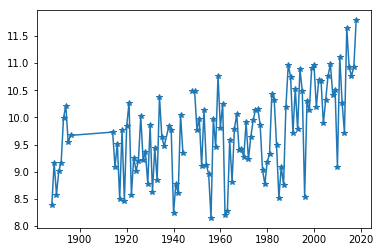

In [83]:
fig1, ax1 = plt.subplots()
#df["JA_TT"].plot(ax = ax1)
ax1.plot(df.index,df["JA_TT"],"*-")